# Naïve Bayes for Email Spam Detection
Naïve Bayes applies Bayes' theorem with the **naïve** assumption that features are conditionally independent. For text classification we convert each message into word-count features. The model estimates how likely each word appears in spam vs. normal mail and combines these independent probabilities to choose the most probable class. Because probabilities multiply, we work in log space to avoid underflow. Metrics such as accuracy, precision, recall, and F1-score provide a balanced picture of performance, while the confusion matrix highlights specific error types.

✅ Model Evaluation Results - Email Spam Detection
Confusion Matrix:
 [[330 409]
 [  0 296]]
Accuracy: 0.6048
Precision: 0.8341
Recall: 0.6048
F1-Score: 0.6100

Detailed Classification Report:
              precision    recall  f1-score   support

    Not Spam       1.00      0.45      0.62       739
        Spam       0.42      1.00      0.59       296

    accuracy                           0.60      1035
   macro avg       0.71      0.72      0.60      1035
weighted avg       0.83      0.60      0.61      1035



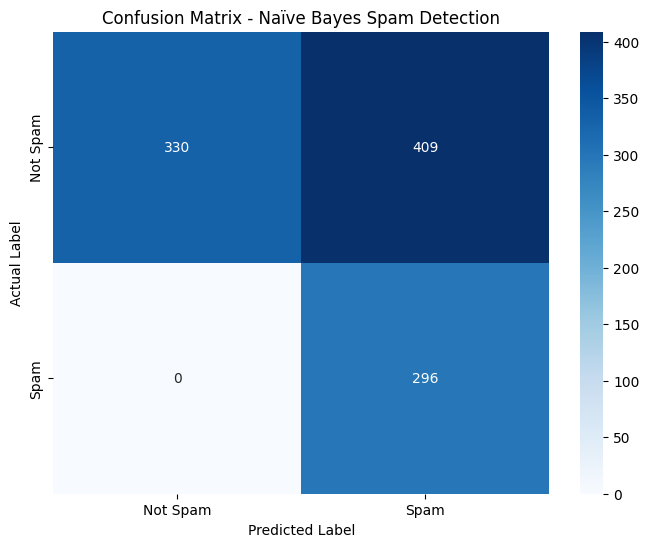

In [5]:
# ==============================================================
# Naïve Bayes Classifier (From Scratch with Laplace Smoothing)
# Application: Email Spam Detection
# ==============================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# --------------------------------------------------------------
# 1️⃣ Load Dataset
# --------------------------------------------------------------
file_path = "./datasets/emails_16_17_18_19.csv"
df = pd.read_csv(file_path)

# Separate features and target
# The first column 'Email No.' is an identifier and not a feature
# The last column 'Prediction' is the target (0 = not spam, 1 = spam)
X = df.iloc[:, 1:-1].values  # All columns except first and last
y = df.iloc[:, -1].values    # Last column (Prediction)

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------------------------------------
# 2️⃣ Naïve Bayes Implementation (From Scratch)
# --------------------------------------------------------------
class NaiveBayesScratch:
    def __init__(self, alpha=1.0):  # Laplace smoothing parameter
        self.alpha = alpha

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.var[c] = X_c.var(axis=0) + 1e-9  # avoid zero variance
            # Prior probability with Laplace smoothing
            self.priors[c] = (X_c.shape[0] + self.alpha) / (X.shape[0] + len(self.classes) * self.alpha)

    def _gaussian_pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        # Add a small epsilon to variance to avoid division by zero
        var = var + 1e-9
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        # To prevent division by zero in the denominator
        return numerator / (denominator + 1e-9)

    def _predict_single(self, x):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            # handle log(0) by adding a small epsilon
            pdf_values = self._gaussian_pdf(c, x)
            pdf_values[pdf_values == 0] = 1e-9
            conditional = np.sum(np.log(pdf_values))
            posterior = prior + conditional
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

# --------------------------------------------------------------
# 3️⃣ Train the Model
# --------------------------------------------------------------
nb = NaiveBayesScratch(alpha=1.0)
nb.fit(X_train, y_train)

# Predict on test data
y_pred = nb.predict(X_test)

# --------------------------------------------------------------
# 4️⃣ Evaluate the Model
# --------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("✅ Model Evaluation Results - Email Spam Detection")
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam']))

# --------------------------------------------------------------
# 5️⃣ Visualization: Confusion Matrix Heatmap
# --------------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title("Confusion Matrix - Naïve Bayes Spam Detection")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
